In [ ]:
import tensorflow as tf # to create model
from tensorflow.keras.preprocessing.image import ImageDataGenerator # to upload data from folders
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import os # to deal with files and folders


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import files
files.upload()  # ارفع kaggle.json


Saving kaggle.json to kaggle (4).json


{'kaggle (4).json': b'{"username":"ahmedmazoon","key":"5a9fd058133358fdf71586ed310118d5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# تحميل الداتا
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip -d intel_image_data

Streaming output truncated to the last 5000 lines.
  inflating: intel_image_data/seg_train/seg_train/mountain/7506.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7537.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7539.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7551.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7560.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7565.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7578.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7581.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7586.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7647.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7652.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7654.jpg  
  inflating: intel_image_data/seg_train/seg_train/mountain/7662.jpg  
  inflating: intel_image_data/seg_train

In [ ]:

gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Parameters
data_path = r"/content/intel_image_data/seg_train/seg_train"
img_size = (100, 100)

train_data = []
train_labels = []
class_names = sorted(os.listdir(data_path))  # class names from folders
class_indices = {name: i for i, name in enumerate(class_names)}

# Load images and assign categorical labels
for class_name in class_names:
    class_folder = os.path.join(data_path, class_name)
    if not os.path.isdir(class_folder):
        continue
    for file in os.listdir(class_folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_folder, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img.astype('float32') / 255.0
                train_data.append(img)
                train_labels.append(class_indices[class_name])

# Convert to numpy arrays
train_data = np.array(train_data)
train_labels = to_categorical(np.array(train_labels))  # one-hot like class_mode='categorical'
train_data, train_labels = shuffle(train_data, train_labels, random_state=42)

print(f"Train images shape: {train_data.shape}")
print(f"Train labels shape: {train_labels.shape}")


Train images shape: (14034, 100, 100, 3)
Train labels shape: (14034, 6)


In [ ]:

from tensorflow.keras.utils import to_categorical

# Path and settings
data_path = r"/content/intel_image_data/seg_test/seg_test"
img_size = (100, 100)

test_data = []
test_labels = []
class_names = sorted(os.listdir(data_path))
class_indices = {name: i for i, name in enumerate(class_names)}

# Load images and their class labels
for class_name in class_names:
    class_dir = os.path.join(data_path, class_name)
    if not os.path.isdir(class_dir):
        continue
    for fname in os.listdir(class_dir):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_dir, fname)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img.astype('float32') / 255.0  # rescale like ImageDataGenerator
                test_data.append(img)
                test_labels.append(class_indices[class_name])

# Convert to arrays
test_data = np.array(test_data)
test_labels = to_categorical(np.array(test_labels))  # one-hot encode

print(f"Train images shape: {test_data.shape}")
print(f"Train labels shape: {test_labels.shape}")


Train images shape: (3000, 100, 100, 3)
Train labels shape: (3000, 6)


In [ ]:
import os
import cv2

path = r"/content/intel_image_data/seg_pred/seg_pred"  # <-- the folder with images
pred_data = []

for filename in os.listdir(path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # supports common image formats
        img_path = os.path.join(path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            pred_data.append(img)

print(f"Loaded {len(pred_data)} images.")


Loaded 7301 images.


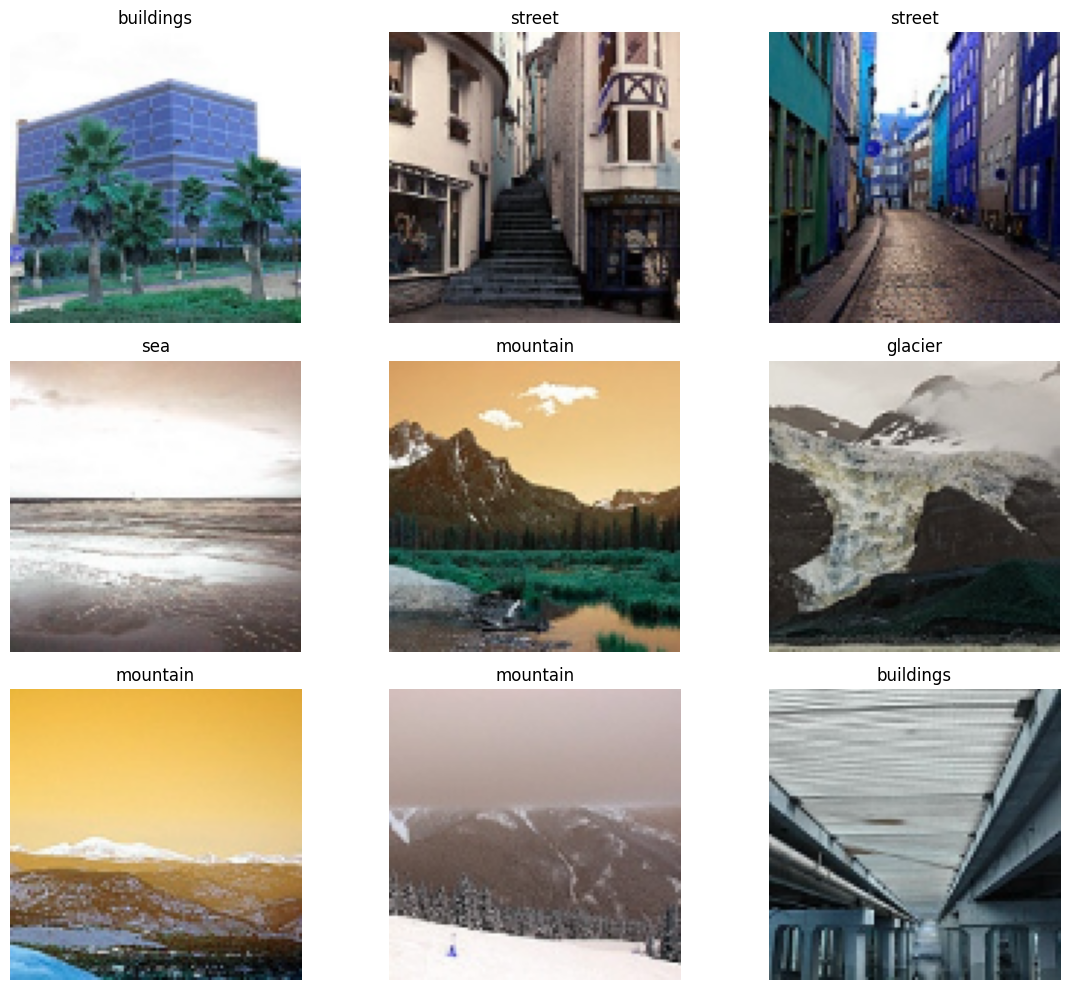

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


images = train_data[:9]  # Select the first 9 images
labels = train_labels[:9]  # Select the corresponding labels


plt.figure(figsize=(12, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')


    class_index = np.argmax(labels[i])
    class_name = list(class_indices.keys())[class_index]
    plt.title(class_name)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(9823, 100, 100, 3)

In [ ]:
# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras import regularizers
from tensorflow import keras

model = Sequential([
    Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)),
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 49s 125ms/step - accuracy: 0.4465 - loss: 1.5356 - val_accuracy: 0.6360 - val_loss: 0.9354
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 56s 70ms/step - accuracy: 0.6561 - loss: 0.9252 - val_accuracy: 0.7260 - val_loss: 0.7564
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.7439 - loss: 0.7024 - val_accuracy: 0.7065 - val_loss: 0.8005
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.8147 - loss: 0.5336 - val_accuracy: 0.7452 - val_loss: 0.7712
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.8611 - loss: 0.4004 - val_accuracy: 0.7371 - val_loss: 0.8083
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9059 - loss: 0.2880 - val_accuracy: 0.7435 - val_loss: 0.8840
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9244 - loss: 0.2244 - val_accuracy: 0.7423 - val_loss: 0.9978
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9433 - loss: 0.1729 -

In [ ]:
model.evaluate(test_data, test_labels)  # تقييم النموذج على بيانات الاختبار

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7464 - loss: 0.7292


[0.7832363843917847, 0.718666672706604]

In [ ]:
# Predicting on new images
# Ensure all images in pred_data are resized to the same shape
pred_data = np.array([cv2.resize(img, img_size) for img in pred_data])  # Resize images
pred_data = pred_data.astype('float32') / 255.0  # Rescale like training data
predictions = model.predict(pred_data)
predicted_classes = np.argmax(predictions, axis=1)  # Get class indices
predicted_classes = [list(class_indices.keys())[i] for i in predicted_classes]  # Convert indices to class names

229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step


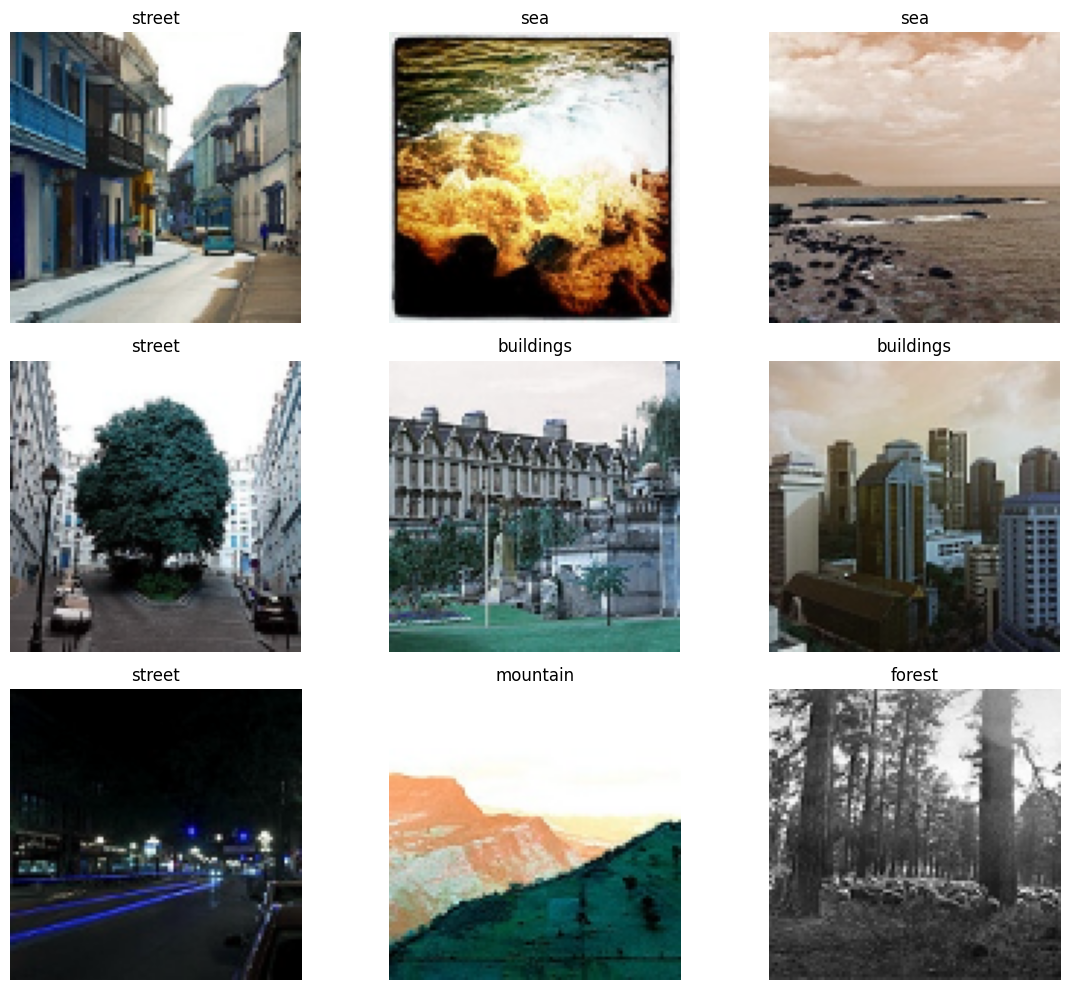

In [ ]:
# Display predictions
plt.figure(figsize=(12, 10))
for i, (img, pred) in enumerate(zip(pred_data[:9], predicted_classes[:9])):  # Limit to 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(pred)
plt.tight_layout()
plt.show()

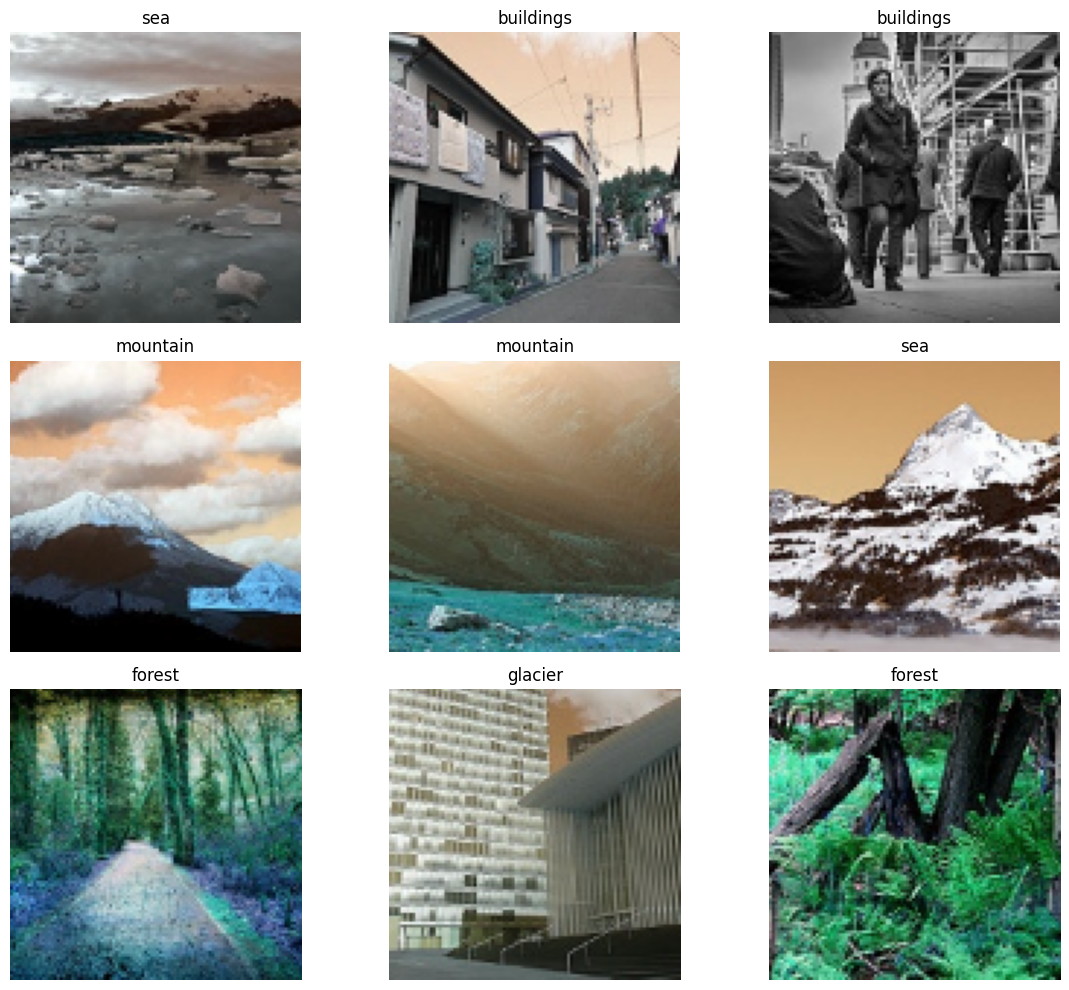

In [ ]:
import random

plt.figure(figsize=(12, 10))
for i, idx in enumerate(random.sample(range(len(pred_data)), 9) ):
    img = pred_data[idx]
    pred = predicted_classes[idx]
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(pred)
plt.tight_layout()
plt.show()